In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tab-hack-20/Week8_test.csv
/kaggle/input/tab-hack-20/Week8_train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [3]:
train = pd.read_csv('../input/tab-hack-20/Week8_train.csv')
train_labels=train['TARGET']
train.drop(columns=['PARTY_ID','TARGET'], inplace=True)

test = pd.read_csv('../input/tab-hack-20/Week8_test.csv')
test.drop(columns=['PARTY_ID'], inplace=True)

df=train.append(test)

In [4]:
set(train.columns)-set(test.columns)

set()

## EDA

In [5]:
df.shape

(221798, 481)

In [6]:
df.head()

,id,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43,V_44,V_45,V_46,V_47,V_48,V_49,...,V_433,V_434,V_435,V_436,V_437,V_438,V_439,V_440,V_441,V_442,V_443,V_444,V_445,V_446,V_447,V_448,V_449,V_450,V_451,V_452,V_453,V_454,V_455,V_456,V_457,V_458,V_459,V_460,V_461,V_462,V_463,V_464,V_465,V_466,V_467,V_468,V_469,V_470,V_471,V_472,V_473,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482
0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,1,0,0,111139.07210,0,520.927066,822.838929,1,0,110.906416,0,0,0,0,0.0,3,0,0.0,1,640,0,0,128.140948,0,0,151.719648,0.0,0,0,0,0.0,0,0,0,0,0,...,0,Aerospace & Defense,0,0,0,0.000000,2,5,0,0.0,0,0,0,0,0,0,0,384.761680,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,5,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,110.038907,0,5,0,0,0,0,33404.59288,0,1260.420076,1914.446743,0,0,8.334129,0,0,0,0,0.0,1,0,0.0,0,13,0,0,43.323947,0,0,0.000000,0.0,0,0,0,0.0,0,0,0,0,0,...,0,Food & Staples Retailing,0,1,0,42.335315,5,3,0,0.0,0,0,0,0,0,0,0,0.000000,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,2,26.010373,0.0,0.0
2,2,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,93638.46286,0,0.000000,264.225940,1,0,0.000000,0,0,0,0,0.0,1,0,0.0,0,21,0,0,108.580345,0,0,0.000000,0.0,0,0,0,0.0,0,0,0,0,0,...,0,"Hotels, Restaurants & Leisure",0,0,0,0.000000,0,4,0,0.0,0,0,0,0,0,0,0,0.000000,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,2248.357090,0.0,0.0
3,3,0,0,0,0,2,0,0,0,0,103.288586,0,4,0,0,0,3,487231.87770,0,4542.194026,376.922314,0,0,0.000000,0,0,0,0,0.0,0,0,0.0,0,91,0,0,0.000000,0,0,53.680217,0.0,0,0,0,0.0,0,0,0,0,0,...,0,NaN,0,0,0,742.138216,251,0,0,0.0,0,0,0,0,0,0,0,181.278645,0,0.0,0,1,0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2285.146561,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,1,0,239895.66040,0,8339.656991,0.000000,1,0,31.790216,0,0,0,0,0.0,0,0,0.0,2,14,0,0,0.000000,0,0,1450.723509,0.0,0,0,0,0.0,1,0,2,0,0,...,1,Industrial Conglomerates,0,0,1,0.000000,11,0,0,0.0,0,0,0,3,0,0,0,0.000000,0,0.0,0,1,0,0.0,0.0,0.0,0,2,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,98.395599,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221798 entries, 0 to 110898
Columns: 481 entries, id to V_482
dtypes: float64(98), int64(375), object(8)
memory usage: 815.6+ MB


In [8]:
df.nunique().sort_values(ascending=False).head(20)

V_279    221796
V_17     221785
V_165    221782
V_307    221758
V_359    210560
V_303    210406
V_281    208707
V_294    208582
V_19     206783
V_103    206216
V_356    201962
V_341    201848
V_424    193026
V_20     192996
V_219    138282
V_181    121235
id       110899
V_480    103375
V_36     103075
V_110    100395
dtype: int64

<AxesSubplot:>

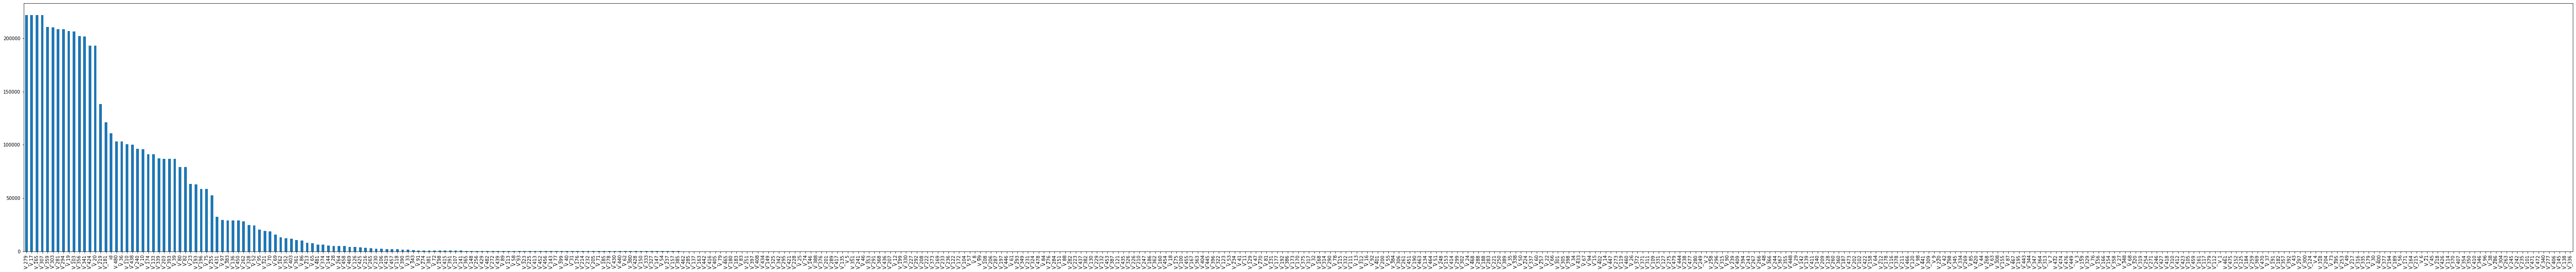

In [9]:
plt.figure(figsize=(100,10))
df.nunique().sort_values(ascending=False).plot.bar()

In [10]:
df.nunique()['V_385'] # From graph

131

In [11]:
object_cols = df.nunique()[df.nunique()<25].index

In [12]:
#df.loc[:, object_cols] = df[object_cols].astype(object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221798 entries, 0 to 110898
Columns: 481 entries, id to V_482
dtypes: float64(98), int64(375), object(8)
memory usage: 815.6+ MB


In [14]:
df.isnull().sum()[df.isnull().sum()>0]

V_301    12536
V_304     3015
V_434    12670
dtype: int64

In [15]:
df[['V_301', 'V_304', 'V_434']].info() # we can fill with NaN string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221798 entries, 0 to 110898
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   V_301   209262 non-null  object
 1   V_304   218783 non-null  object
 2   V_434   209128 non-null  object
dtypes: object(3)
memory usage: 6.8+ MB


In [16]:
#df.fillna('NaN', inplace=True)

In [17]:
train_labels.value_counts()

0    89367
1    21532
Name: TARGET, dtype: int64

## Training and Prediction

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221798 entries, 0 to 110898
Columns: 481 entries, id to V_482
dtypes: float64(98), int64(375), object(8)
memory usage: 815.6+ MB


In [19]:
df_dummies = pd.get_dummies(df.drop(columns='id'), drop_first=True)

In [20]:
df_train = df_dummies[:train.shape[0]]
df_test = df_dummies[train.shape[0]:]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_train, train_labels, train_size=0.2, random_state=4)

In [22]:
xgbc=XGBClassifier()
predict = xgbc.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test,predict), precision_score(y_test,predict), recall_score(y_test,predict), f1_score(y_test,predict)

(0.8264201983769162,
 0.6585453242565389,
 0.21409435061153173,
 0.32313642756680727)

In [23]:
pred = xgbc.fit(df_train, train_labels).predict(df_test)

In [24]:
submission = pd.DataFrame(train.id)
submission['TARGET'] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,id,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
